# Simple Linear Regression
In this simple regression task we are going to make a prediction of the percentage of marks that a student can score based on the number of hours they study. Since the task involves only two variables, it is a simple linear regression task.

# Importing all the required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd

In [2]:
%matplotlib inline 
# used toshow the graph inline that is below each code and also as a part of the current notebook

# Importing the dataset

In [3]:
dataset_path = 'http://bit.ly/w-data'
df = pd.read_csv(dataset_path)

In [4]:
df # the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.head() # for viewing first five entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail(6) # for viewing last six entries

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.isnull().sum() 
# this is used to check total null values in the dataset.

Hours     0
Scores    0
dtype: int64

# Plotting the data on a graph

Text(0, 0.5, 'Scores')

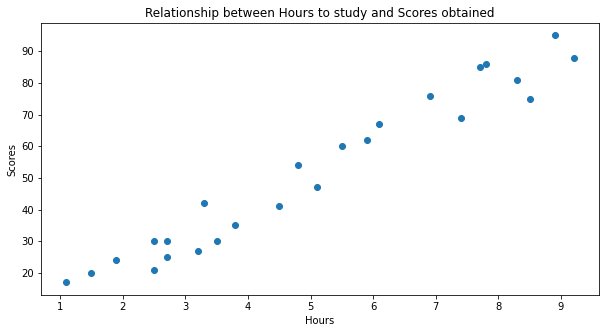

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

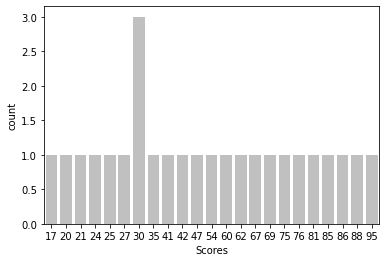

In [10]:
sns.countplot(x='Scores',data=df,color='silver')

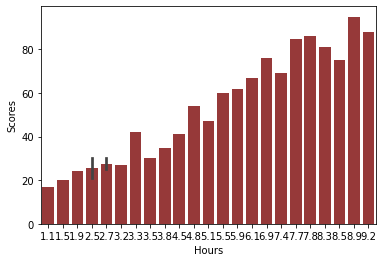

In [11]:
sns.barplot(x='Hours',y='Scores',data=df, color='brown')

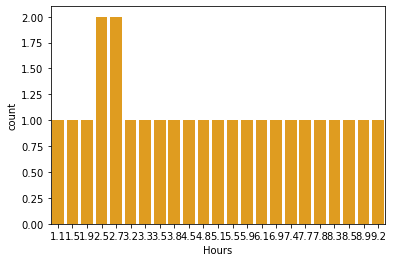

In [12]:
sns.countplot(x='Hours',data=df,color='orange')

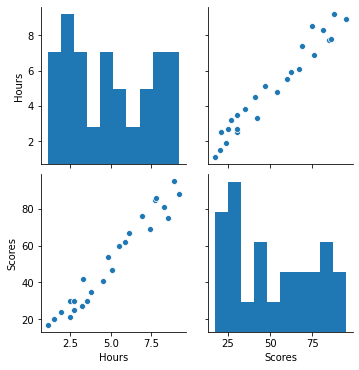

In [13]:
sns.pairplot(df)

# Checking the relationship between Target and feature

Text(0, 0.5, 'Scores')

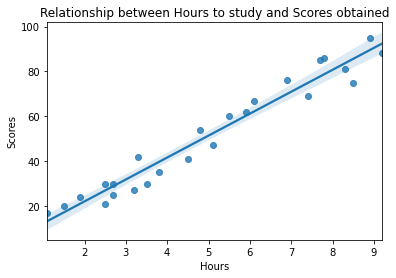

In [14]:
sns.regplot(x=df['Hours'],y=df['Scores'],data=df)
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [15]:
x= df[['Hours']].values
y=df[['Scores']].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

# Model using the algorithm

In [17]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [18]:
lm.fit(xtrain,ytrain)
#fit Model on training Data

LinearRegression()

Plot the regression line

In [19]:
line = lm.coef_*x+lm.intercept_


Now plot for the test data

Text(0, 0.5, 'Scores')

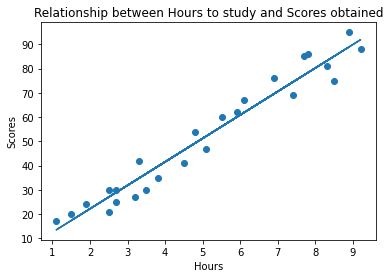

In [20]:
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

## Now initiate predictions

In [21]:
print('Training score')
print(lm.score(xtrain, ytrain))
print('Test score')
print(lm.score(xtest, ytest))

Training score
0.9491209376364416
Test score
0.9678055545167994


In [22]:
ypred= lm.predict(xtest)
ytest

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [23]:
ypred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

# Here, any user can also test with their own respective data

In [24]:
print("No of Hours = ",9.25)
print("Predicted Score = ",lm.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


# Hence, we conclude by finally evaluating the model

In [29]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(ytest, ypred))

MAE:  3.9207511902099244


In [30]:
print('MSE: ', metrics.mean_squared_error(ytest, ypred))

MSE:  18.943211722315272


In [31]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

RMSE:  4.352380006653288
